# **Задание**

1. Скачайте материалы к занятию.  
2. Проанализируйте ряды и сделайте их стационарными.  
3. Пришлите решение в виде ссылки на GitHub с ноутбуком.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

In [5]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

In [7]:
def tsplot(y, lags=None, figsize=(14, 6), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Graphs')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# Отображение графиков

x = 0, y = 0, key = Monthly sales of company X
x = 1, y = 0, key = Monthly Boston armed robberies
x = 0, y = 1, key = International airline passengers: monthly totals in thousands
x = 1, y = 1, key = Mean monthly air temperature (Deg. F) Nottingham Castle
x = 0, y = 2, key = Weekly closings of the Dow-Jones industrial average
x = 1, y = 2, key = Daily total female births in California


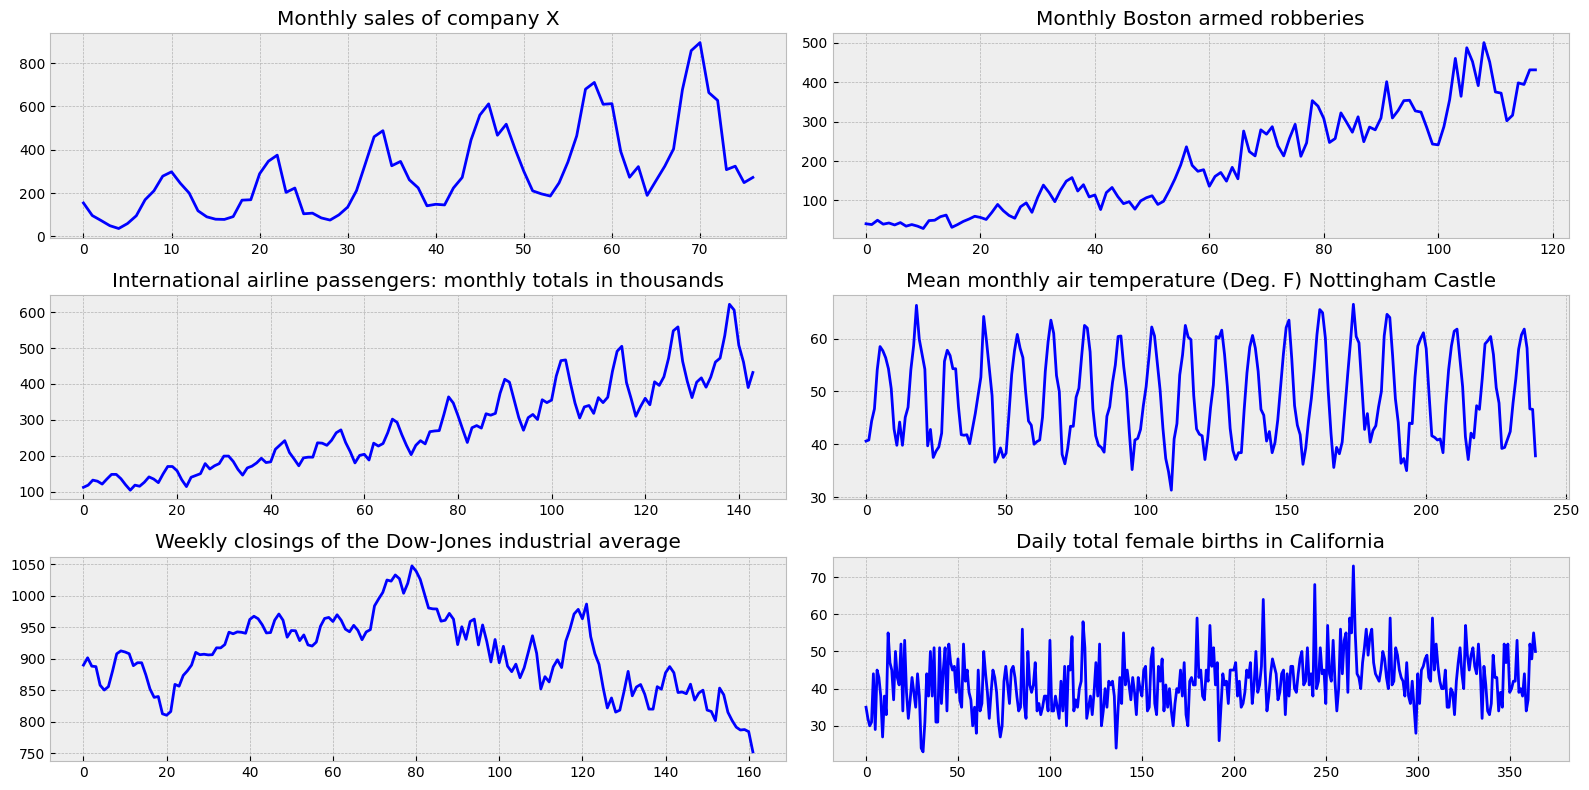

In [8]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        print(f'x = {x}, y = {y}, key = {key}')
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# **1. Monthly sales of company X**

## Проверка на стационарность

In [9]:
test_stationarity(all_series["Monthly sales of company X"])

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


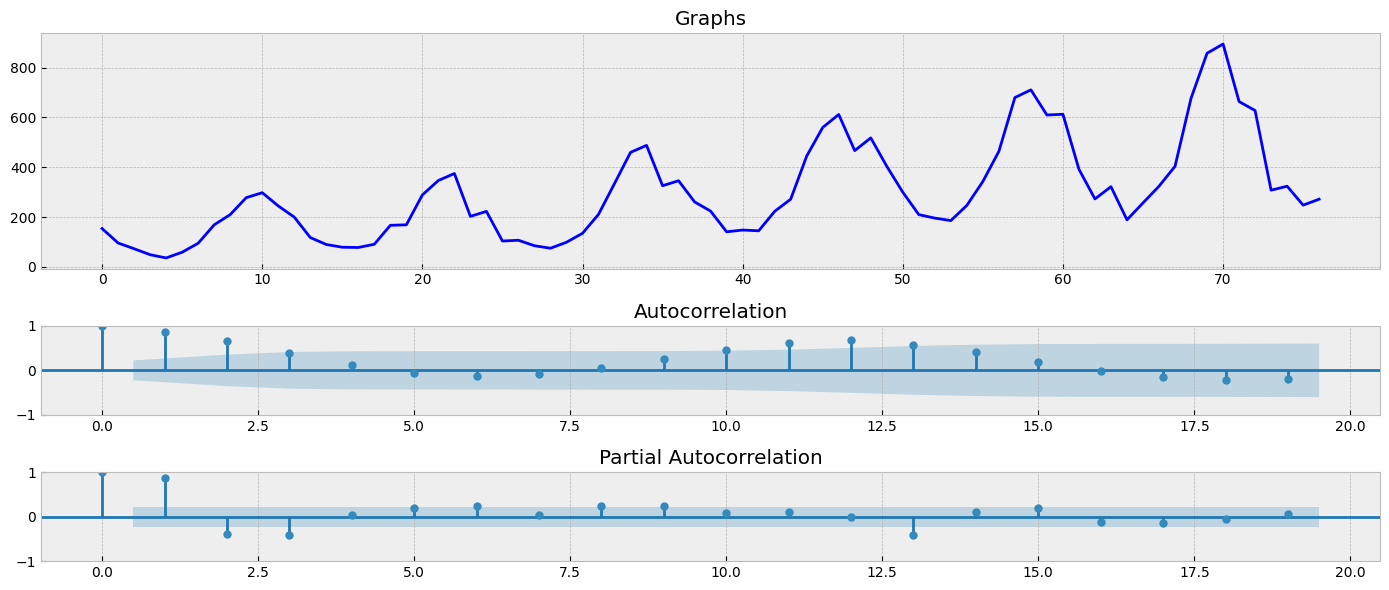

In [10]:
tsplot(all_series["Monthly sales of company X"])

## Ищем сезонность

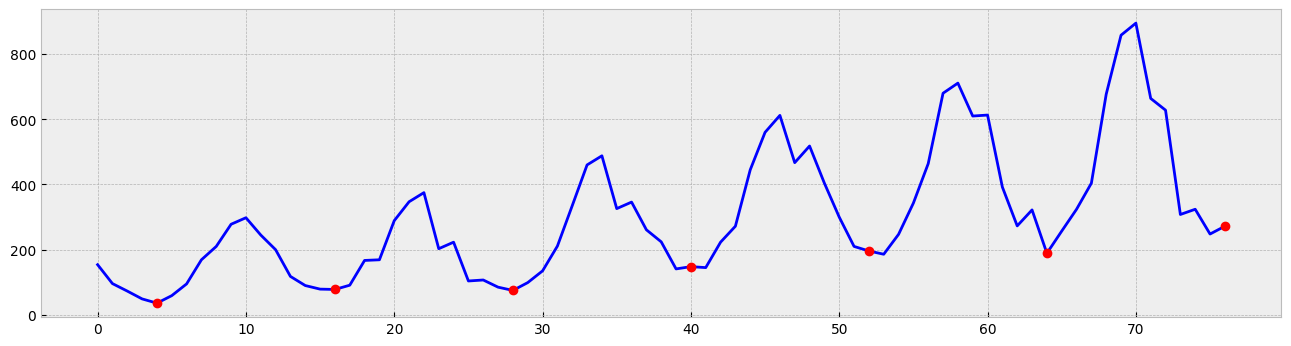

In [11]:
plot_ts_and_points(sales_of_company_x["Count"], 4, 12)

## Нормализуем дисперсию

In [12]:
series = boxcox(all_series["Monthly sales of company X"], 0)

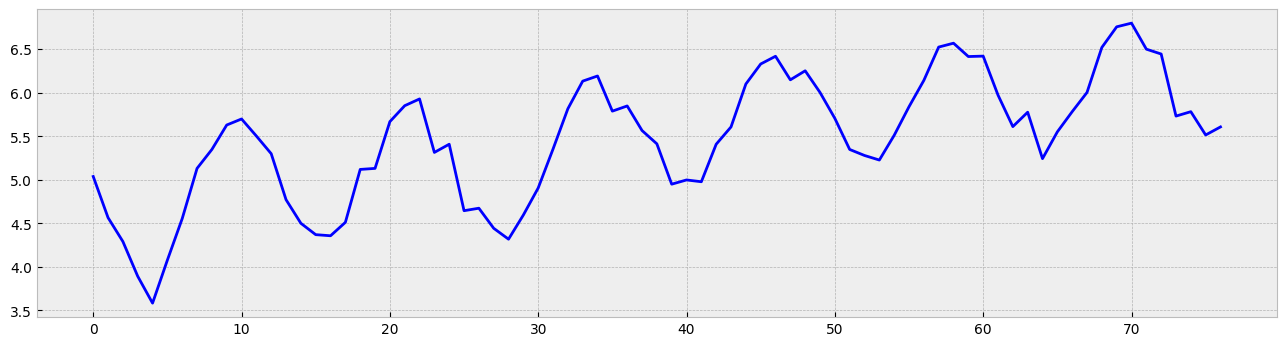

In [13]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Let's remove seasonality but the length will be reduced a little bit

In [14]:
series = series[16:] - series[4:-12]

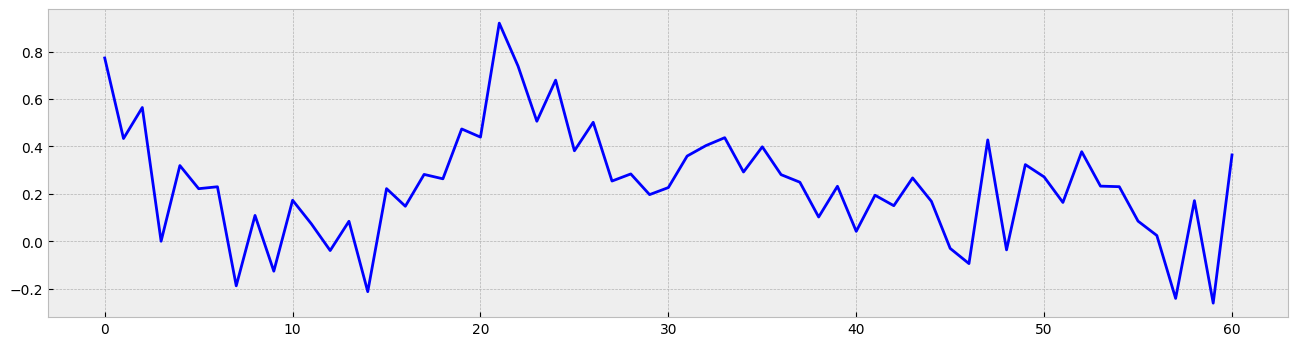

In [15]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Дифференцируем 

In [16]:
series = np.diff(series, 2)

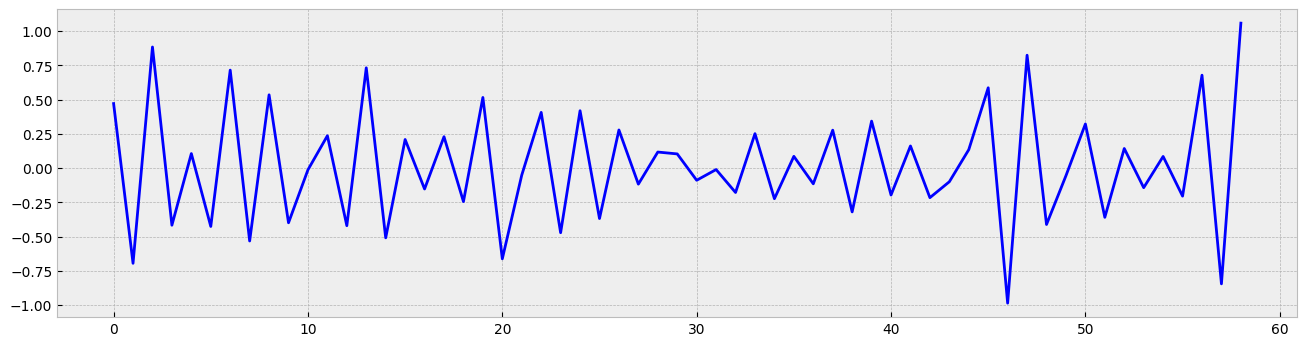

In [17]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Проверка на стационарность: Тест Дики-Фуллера 

In [18]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                 -4.580921
p-value                         0.000140
#Lags Used                      9.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


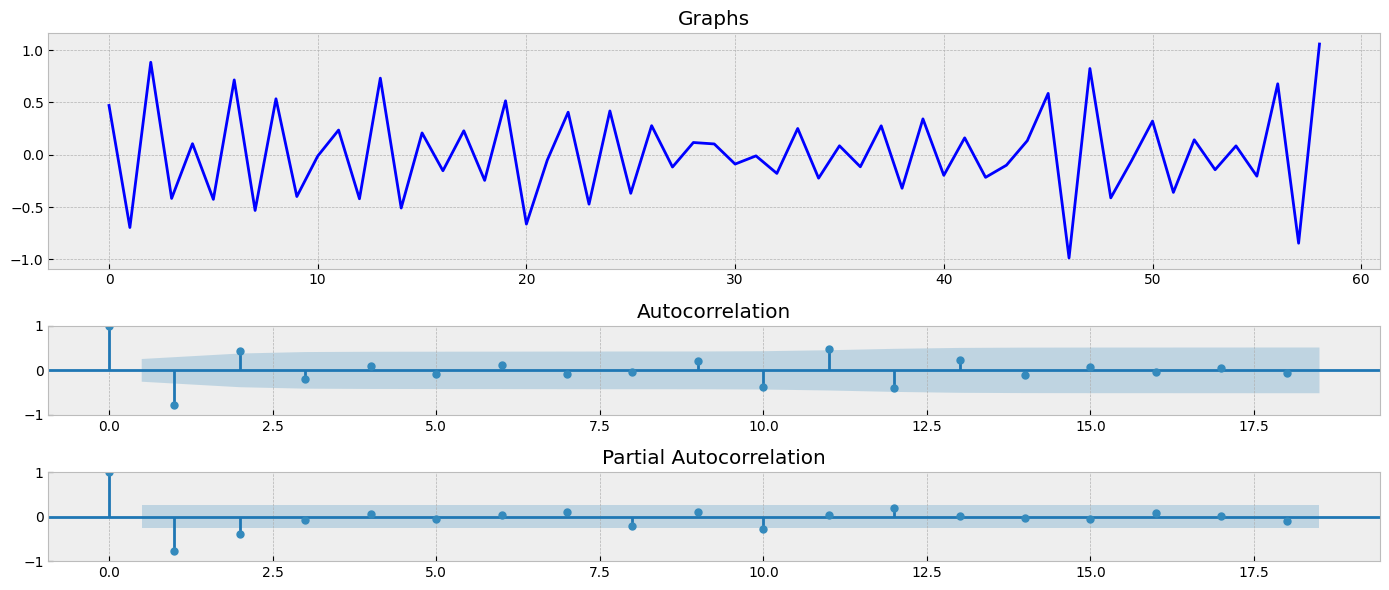

In [19]:
tsplot(series)

### **Conclusion:**  
Ряд стал стационарным, поскольку p-value < 0.05, да и по остальным признакам всё ОК.

# **2. Monthly Boston armed robberies**

## Проверка на стационарность

In [20]:
test_stationarity(all_series["Monthly Boston armed robberies"])

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


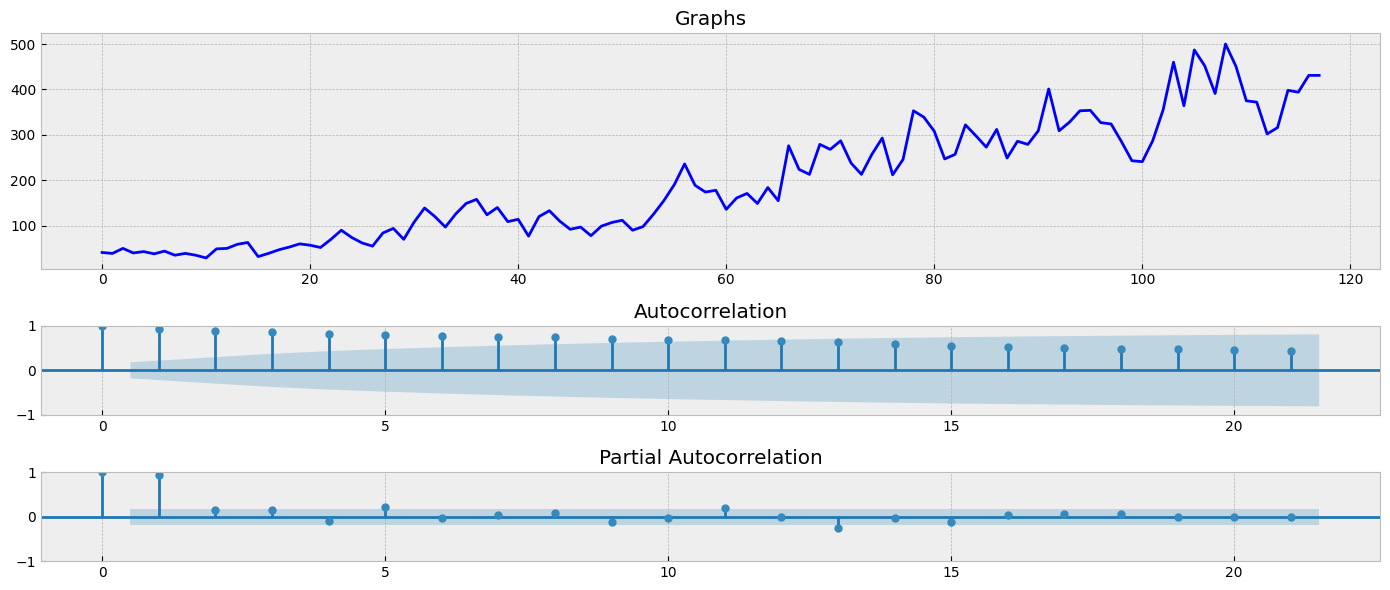

In [21]:
tsplot(all_series["Monthly Boston armed robberies"])

### Визуально, сезонность не просматривается, попробуем обойтись только уменьшением дисперсии и ликвидацией тренда .

## Нормализуем дисперсию

In [22]:
series = boxcox(all_series["Monthly Boston armed robberies"], 0)

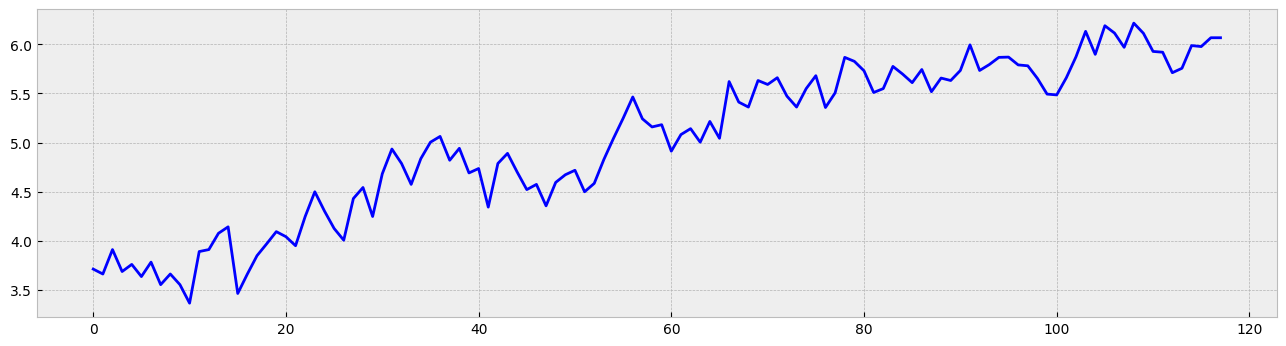

In [23]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Дифференцируем 

In [24]:
series = np.diff(series, 1)

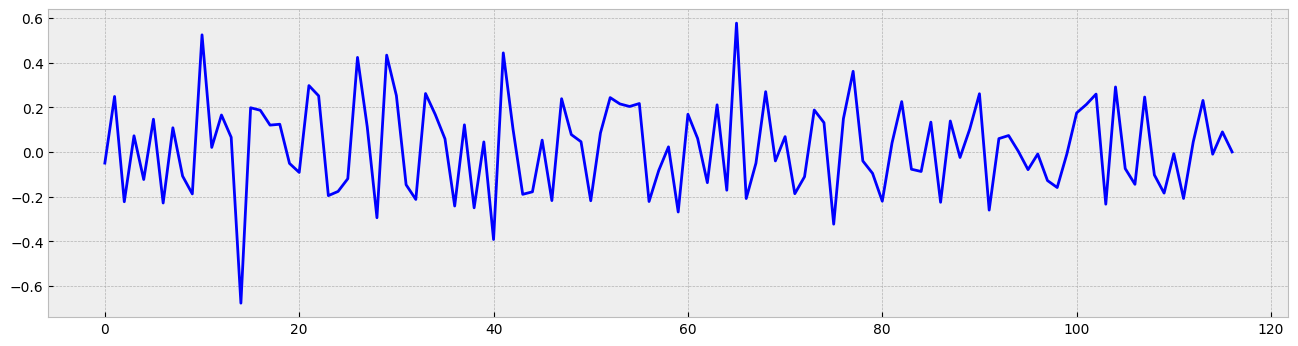

In [25]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Проверка на стационарность: Тест Дики-Фуллера 

In [26]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


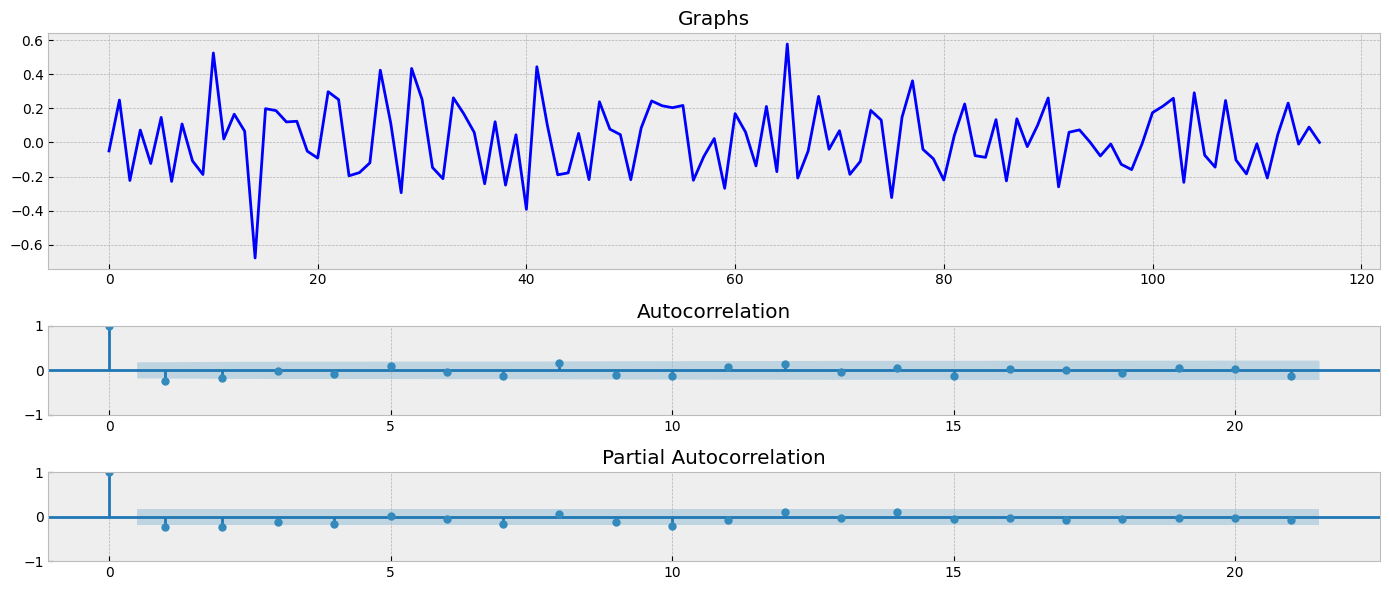

In [27]:
tsplot(series)

### **Conclusion:**  
Ряд стал стационарным, поскольку p-value значительно < 0.05, да и по остальным признакам всё ОК. 

# **3. International airline passengers: monthly totals in thousands**

## Проверка на стационарность

In [28]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


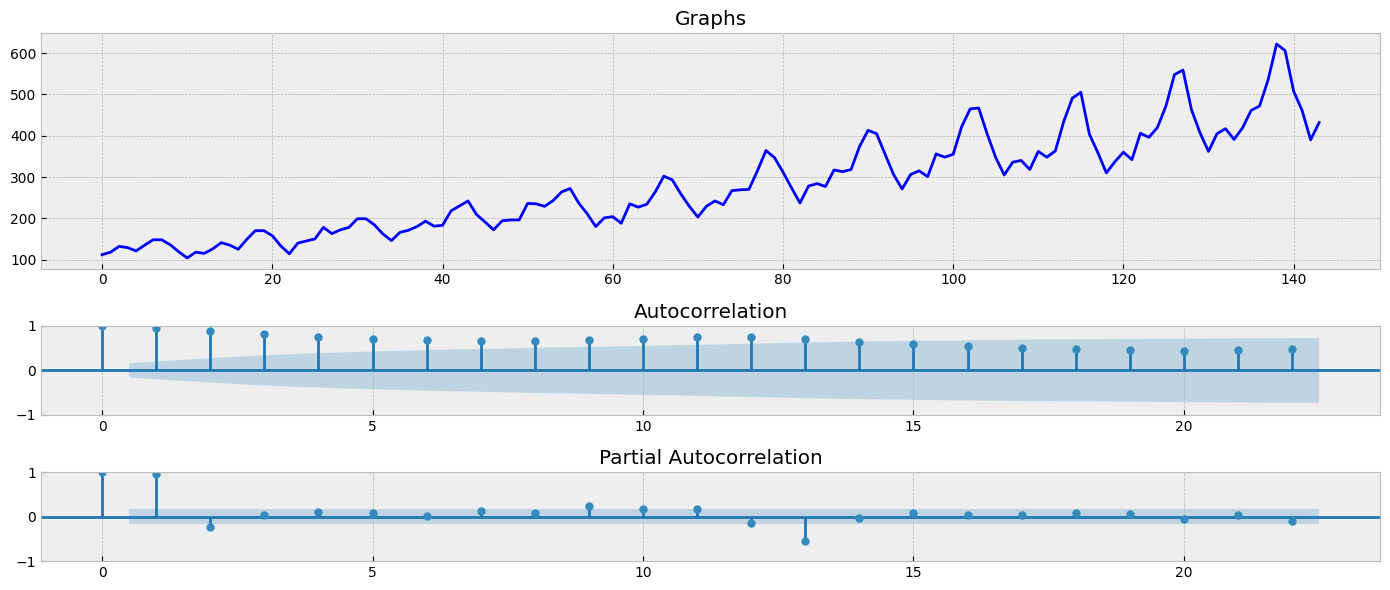

In [29]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

## Ищем сезонность

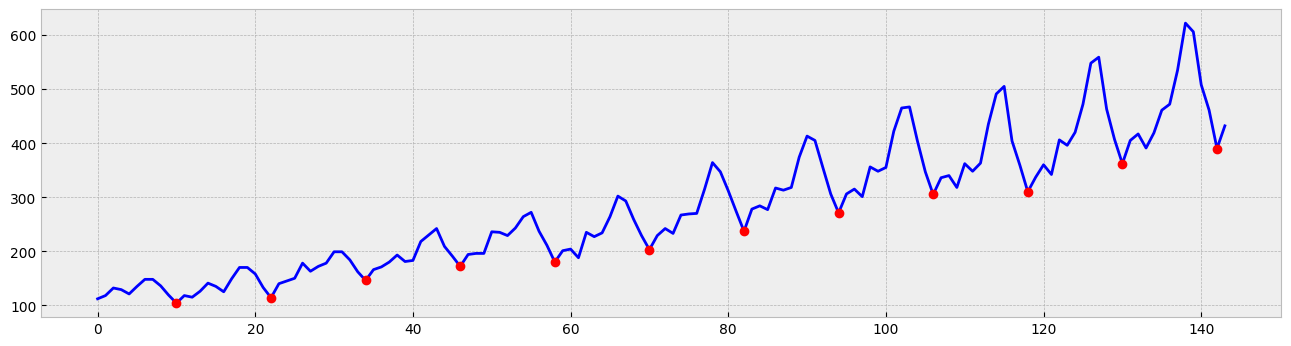

In [30]:
plot_ts_and_points(airlines_passengers["Count"], 10, 12) # seasonality exists ...

## Нормализуем дисперсию

In [31]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

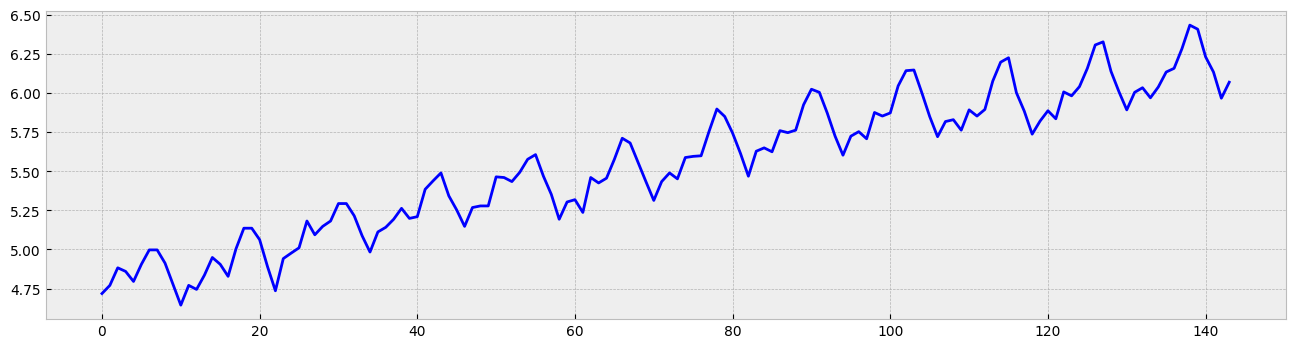

In [32]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Let's remove seasonality

In [33]:
series = series[22:] - series[10:-12]

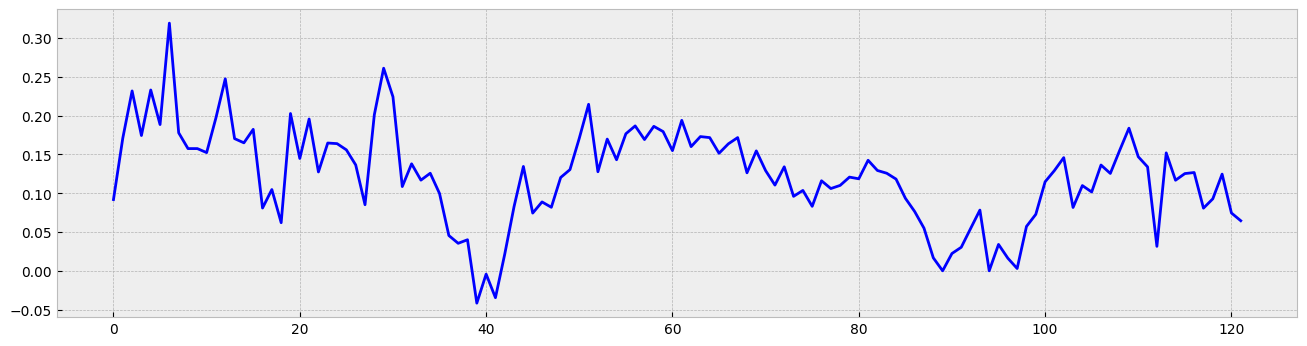

In [34]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Дифференцируем 

In [35]:
series = np.diff(series, 1)

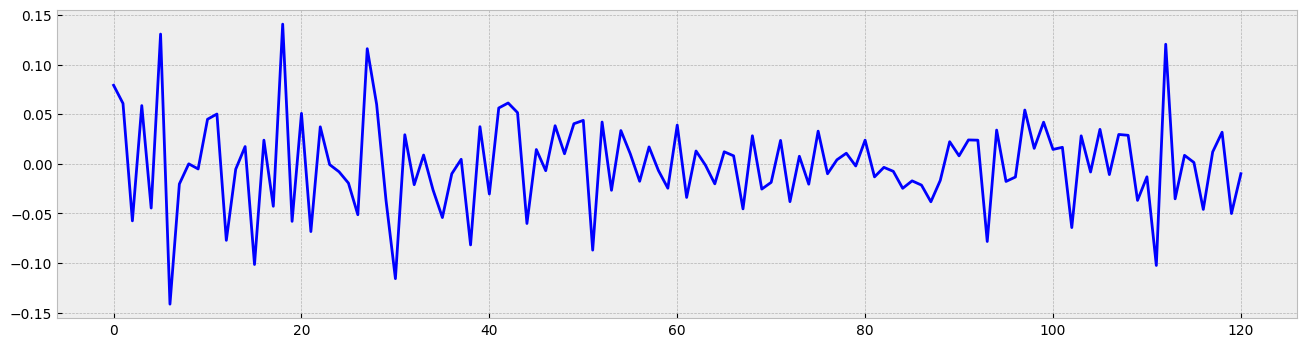

In [36]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Проверка на стационарность: Тест Дики-Фуллера 

In [37]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -4.152621
p-value                          0.000792
#Lags Used                      11.000000
Number of Observations Used    109.000000
Critical Value (1%)             -3.491818
Critical Value (5%)             -2.888444
Critical Value (10%)            -2.581120
dtype: float64


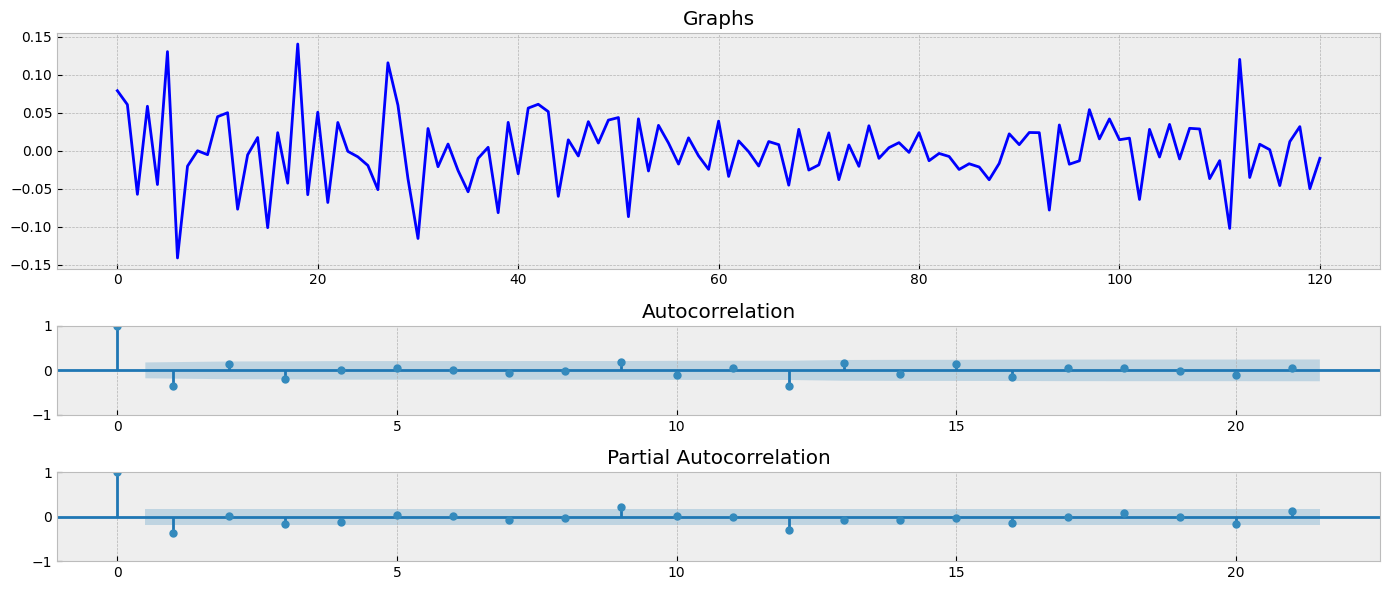

In [38]:
tsplot(series)

### **Conclusion:**  
Ряд стал стационарным, поскольку p-value < 0.05, да и по остальным признакам всё ОК.

# **4. Mean monthly air temperature (Deg. F) Nottingham Castle**

## Проверка на стационарность

In [39]:
test_stationarity(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


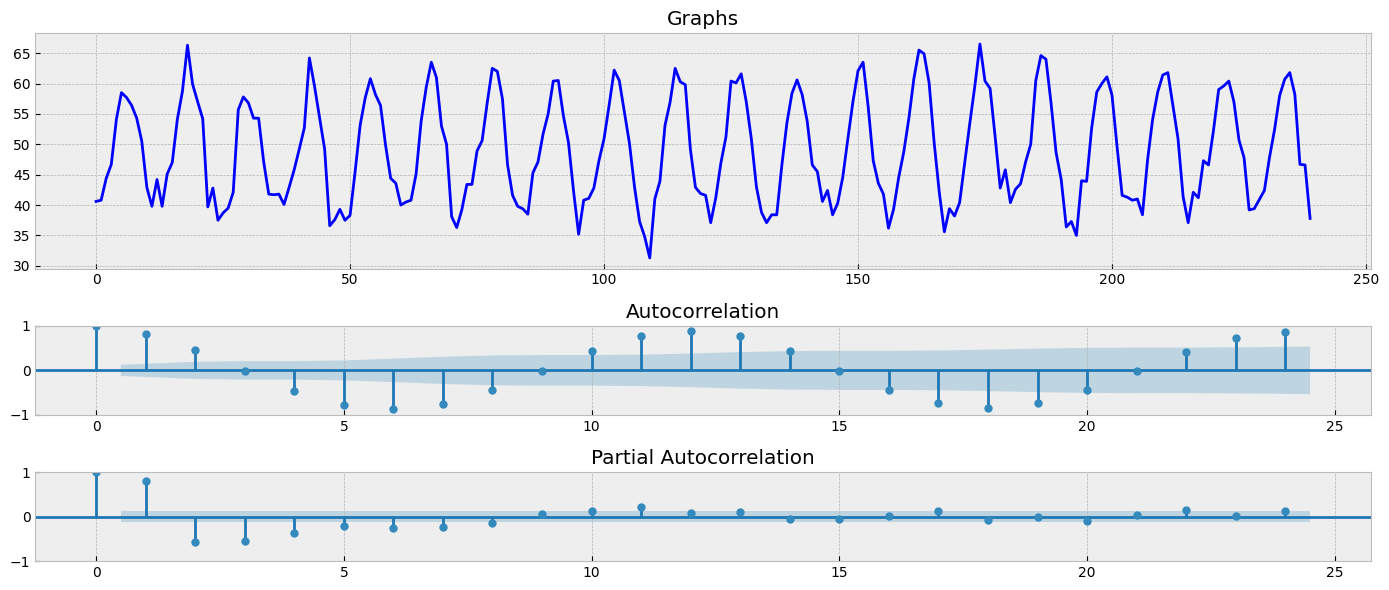

In [40]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

### Хотя p-value < 0.05 просматривается сезонность, которую уберём и сделаем ряд действительно стационарным

## Ищем сезонность

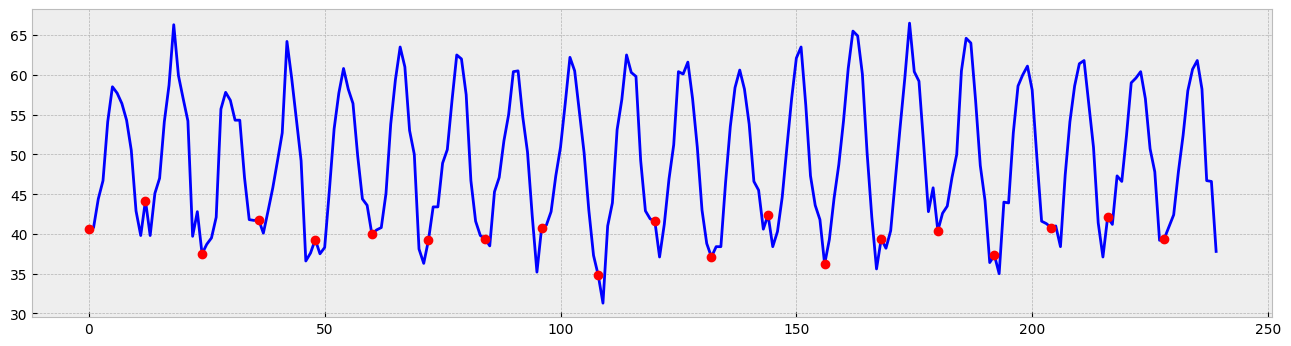

In [41]:
plot_ts_and_points(mean_monthly_temp["Deg"], 0, 12) # seasonality exists ...

## Нормализуем дисперсию

In [42]:
series = boxcox(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"], 0)

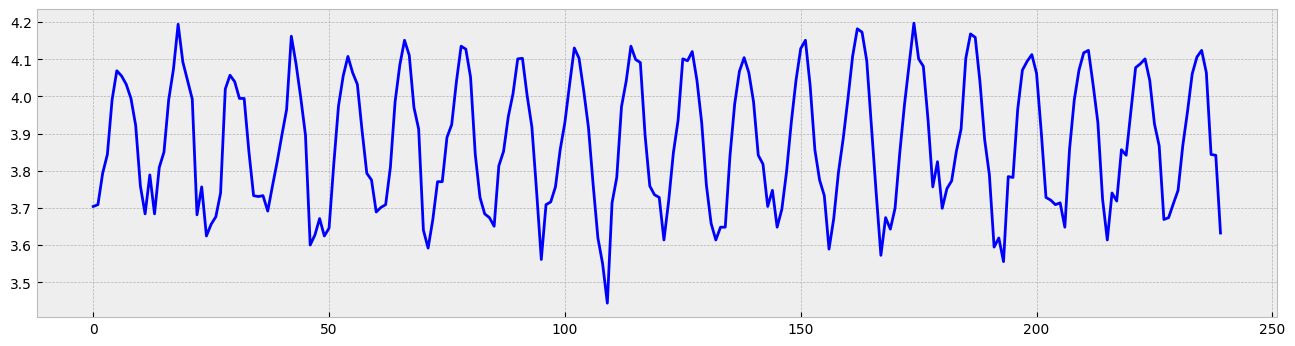

In [43]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Let's remove seasonality

In [44]:
series = series[12:] - series[:-12]

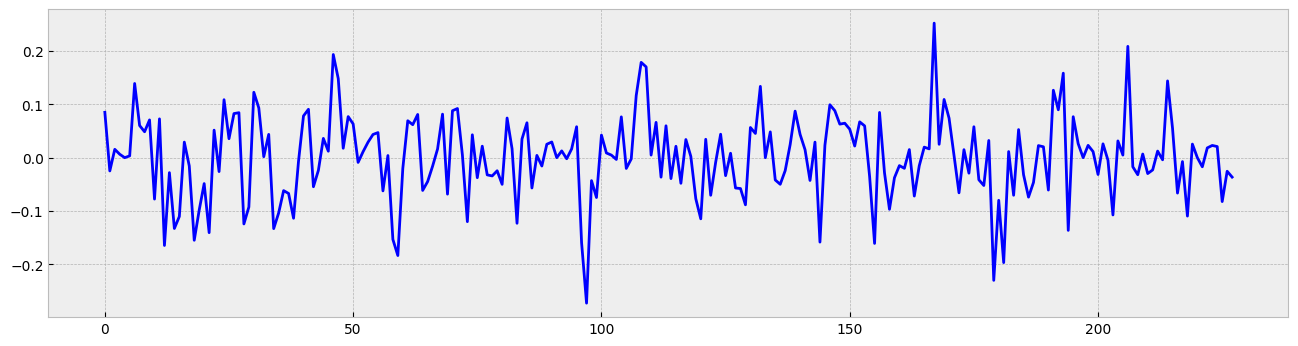

In [45]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

In [46]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


### **Conclusion:**  
Ряд стационарный с уменьшенной дисперсией

# **5. Weekly closings of the Dow-Jones industrial average**

## Проверка на стационарность

In [47]:
test_stationarity(all_series["Weekly closings of the Dow-Jones industrial average"])

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


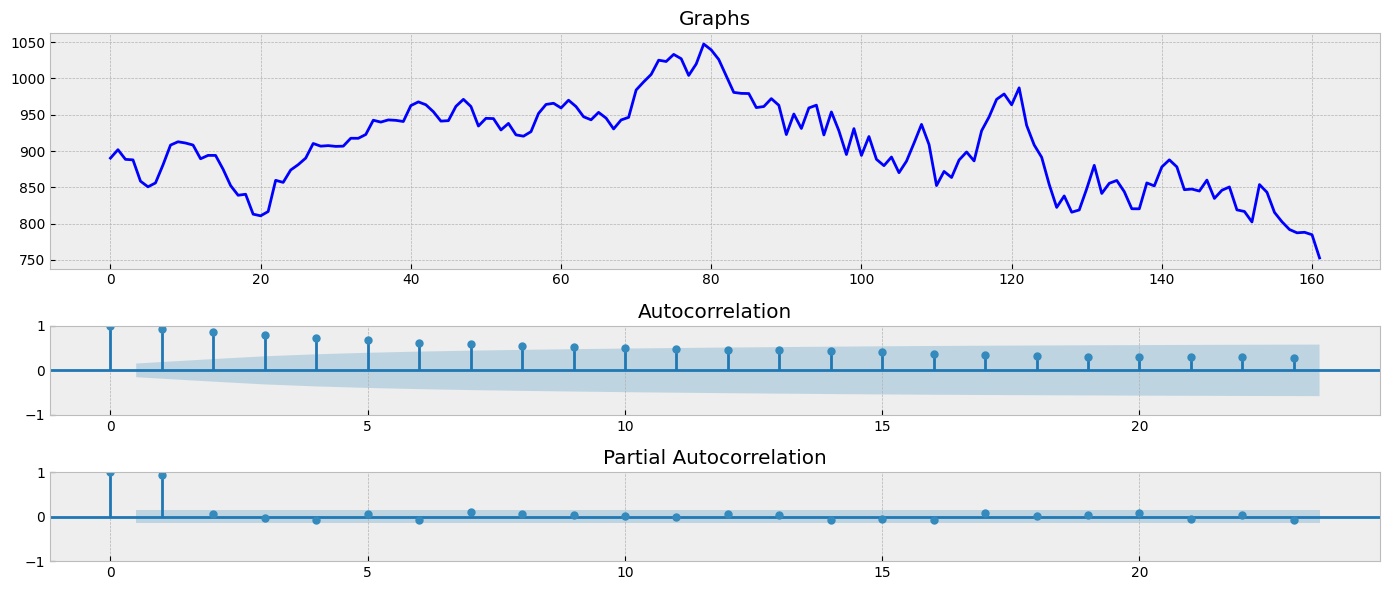

In [48]:
tsplot(all_series["Weekly closings of the Dow-Jones industrial average"])

### Сезональность не просматривается

## Нормализуем дисперсию

In [49]:
series = boxcox(all_series["Weekly closings of the Dow-Jones industrial average"], 0)

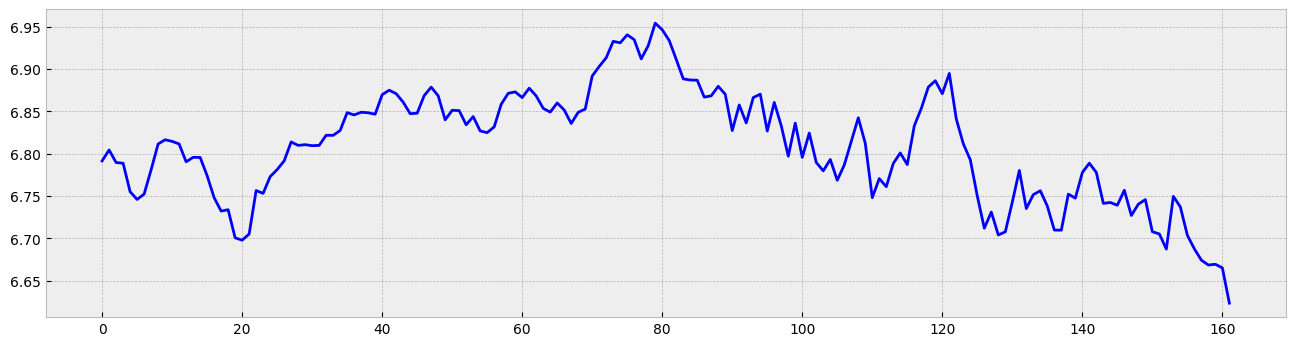

In [50]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Дифференцируем 

In [51]:
series = np.diff(series, 1)

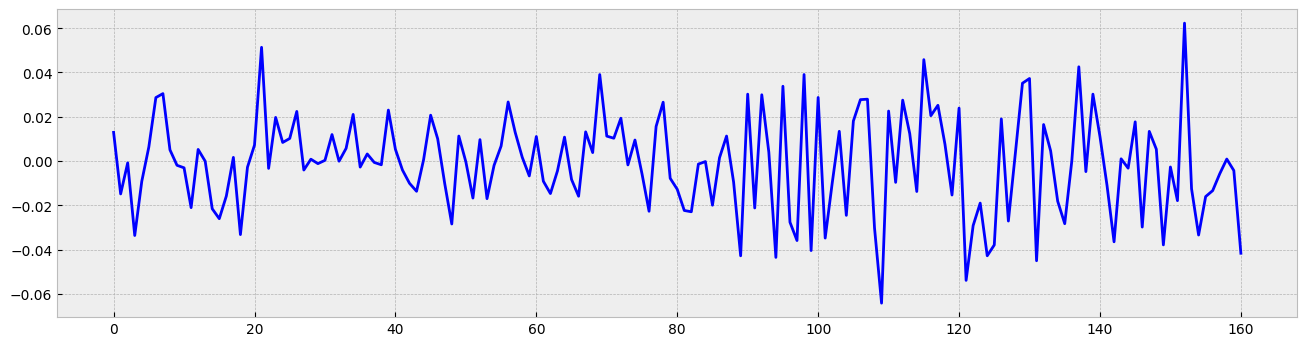

In [52]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Проверка на стационарность: Тест Дики-Фуллера 

In [53]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


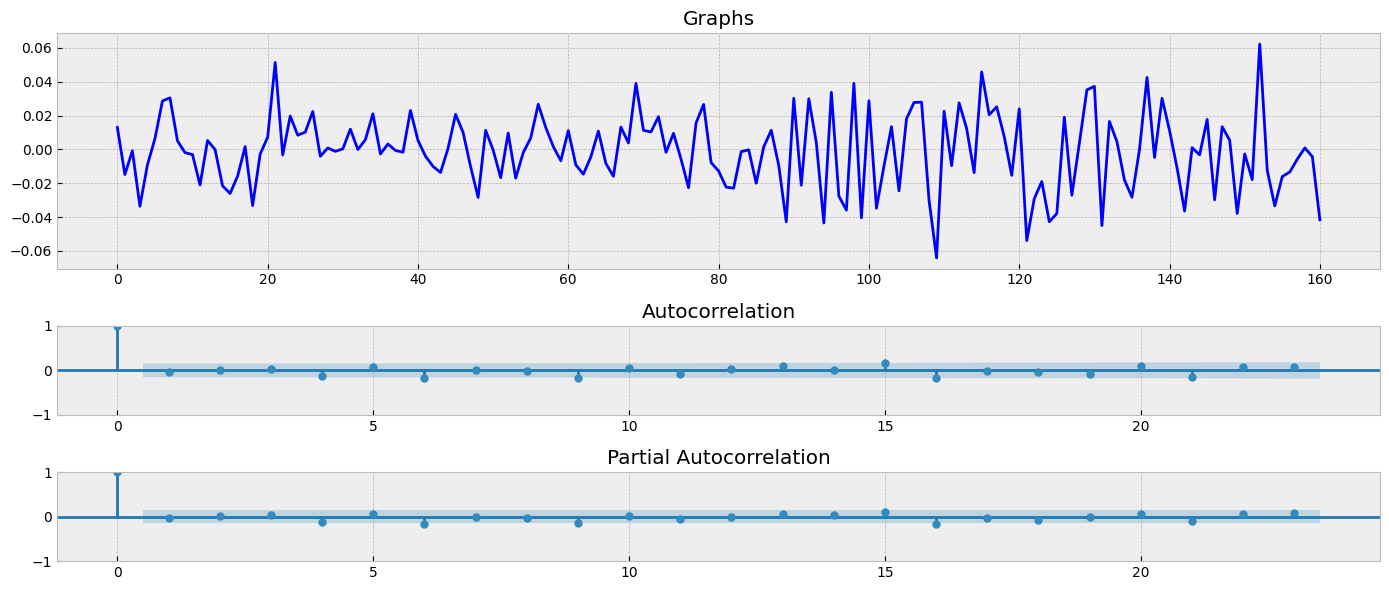

In [54]:
tsplot(series)

### **Conclusion:**  
Ряд стал стационарным, поскольку p-value < 0.05, да и по остальным признакам всё ОК.

# **6. Daily total female births in California**

## Проверка на стационарность

In [55]:
test_stationarity(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


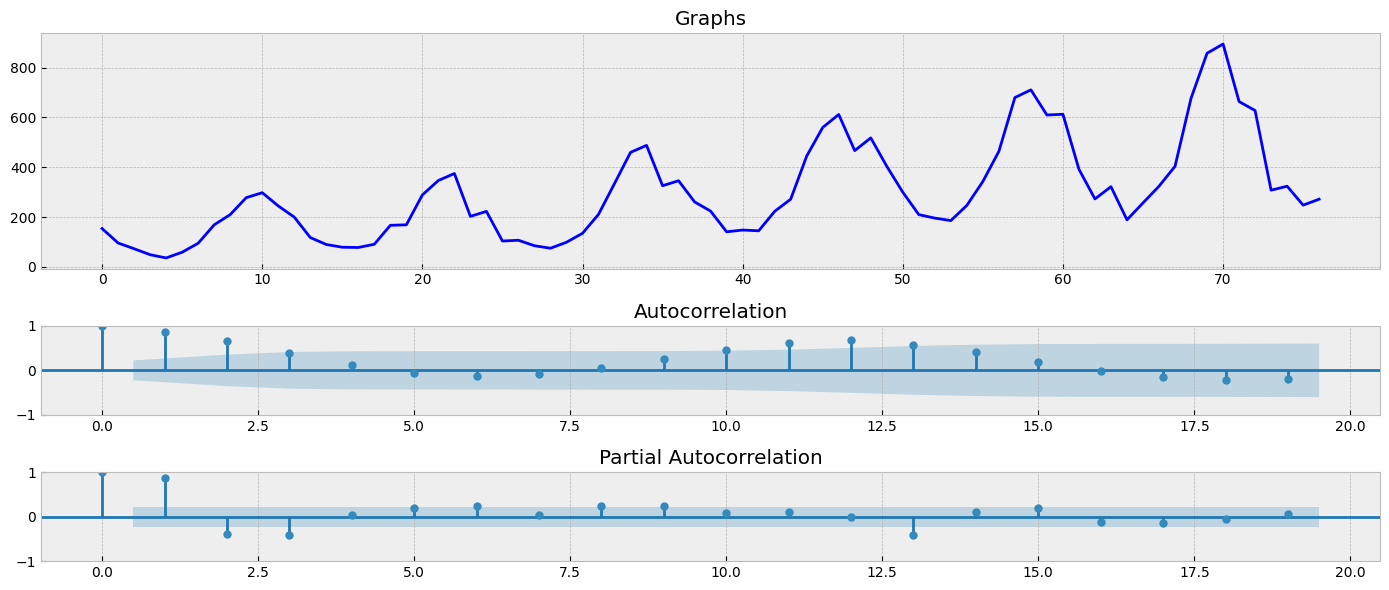

In [56]:
tsplot(all_series["Monthly sales of company X"])

### По p-value ряд стационарный, но видна сезонность, тренд, поэтому улучшим показатели

## Ищем сезонность

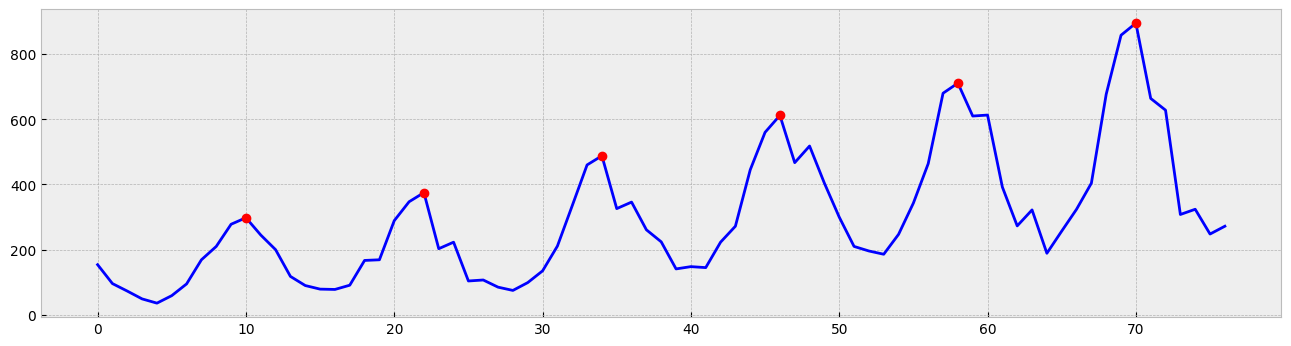

In [57]:
plot_ts_and_points(sales_of_company_x["Count"], 10, 12)

## Нормализуем дисперсию

In [58]:
series = boxcox(all_series["Daily total female births in California"], 0)

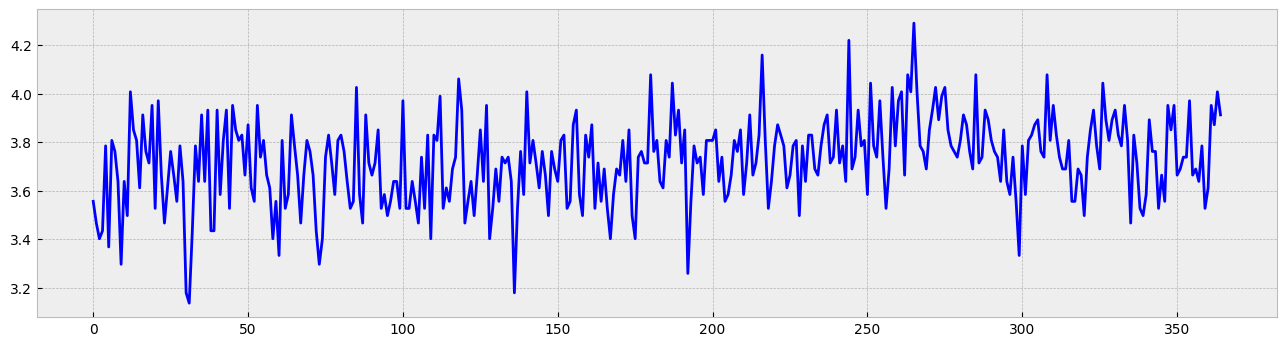

In [59]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Let's remove seasonality

In [60]:
series = series[22:] - series[10:-12]

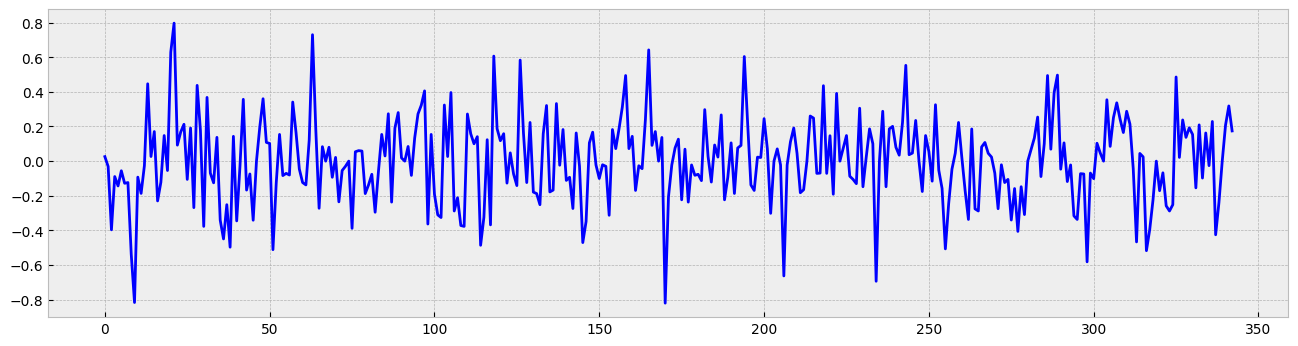

In [61]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Дифференцируем 

In [62]:
series = np.diff(series, 1)

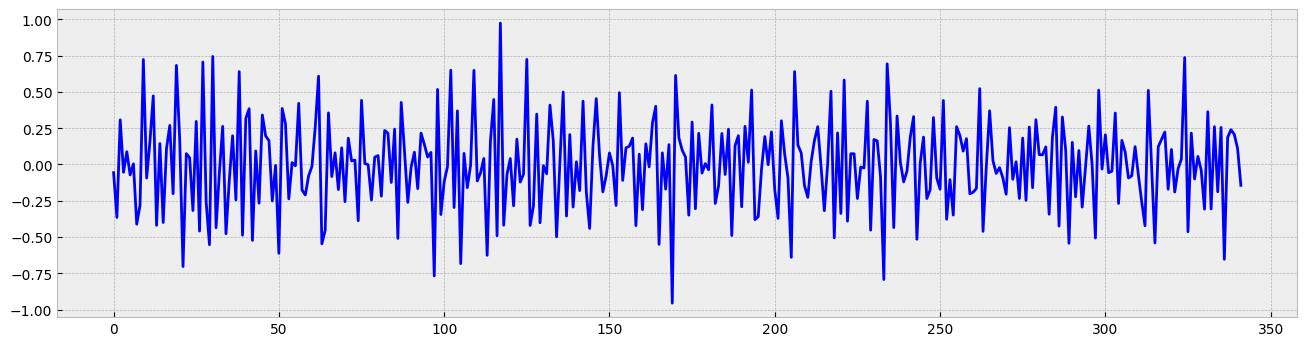

In [63]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 4))
        plt.plot(series, color='blue')

## Проверка на стационарность: Тест Дики-Фуллера 

In [64]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                -8.342229e+00
p-value                        3.153523e-13
#Lags Used                     1.700000e+01
Number of Observations Used    3.240000e+02
Critical Value (1%)           -3.450695e+00
Critical Value (5%)           -2.870502e+00
Critical Value (10%)          -2.571545e+00
dtype: float64


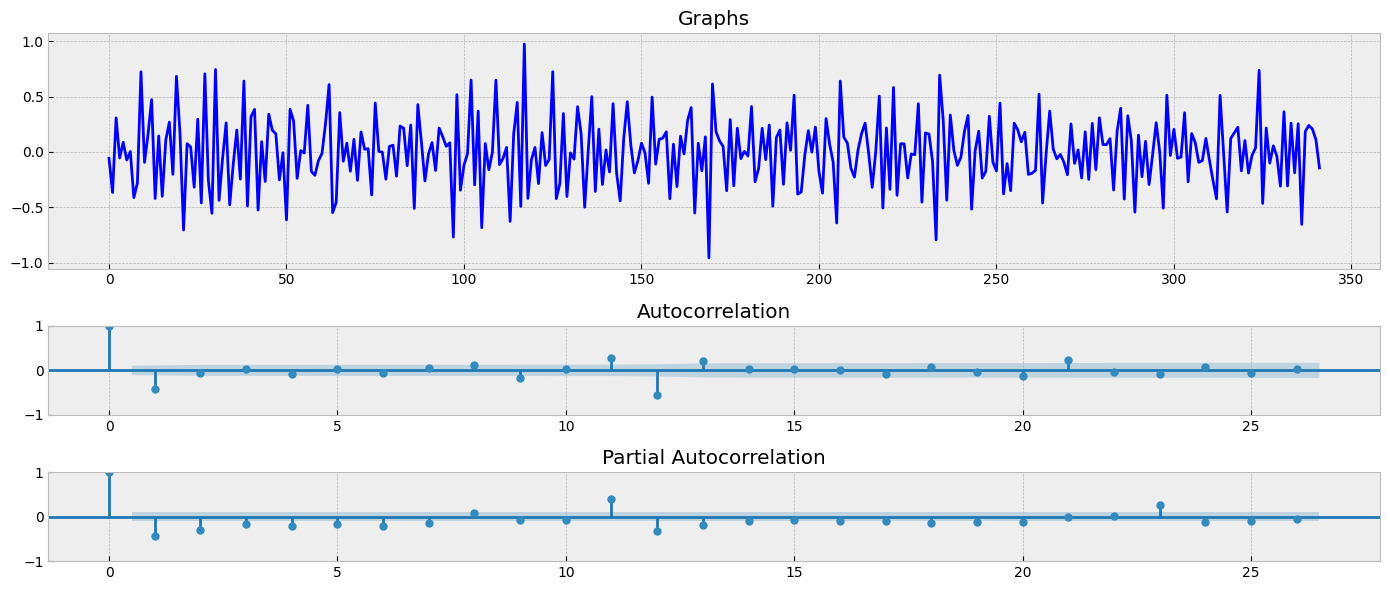

In [65]:
tsplot(series)

### **Conclusion:**  
Ряд стал стационарным, поскольку p-value < 0.05, да и по остальным признакам всё ОК.